# Estimación de Metales Pesados (Gathering to EDA)

## 1) Gathering

Se obtienen los datos de muestreo hechos por Sernageomin desde 2015 hasta 2017

In [36]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df_geoquimica = pd.read_excel("../Data/raw/Datos-de-Geoquímica-de-Depósitos-de-Relaves-de-Chile-2023.xlsx")
df_geoquimica

,IDQ,Empresa o Dueno,Faena,Deposito,Recurso,masa (t),Estado,Origen,Region,Comuna,...,Tb(g/t),Dy(g/t),Ho(g/t),Er(g/t),Tm(g/t),Yb(g/t),Lu(g/t),Au(g/t),Hg(g/t),Unnamed: 69
0,1,CIA. MINERA LA PATAGUA,LA PATAGUA,JAVITO,COBRE,NaN,ACTIVO,MURO,VALPARAISO,LA LIGUA,...,0.54,2.81,0.71,1.79,0.24,1.75,0.23,"<0,02","<0,01",NaN
1,2,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,LAS CENIZAS 4,COBRE,NaN,INACTIVO,MURO,VALPARAISO,CABILDO,...,0.44,2.79,0.55,1.4,0.21,1.45,0.17,"<0,02","<0,01",NaN
2,3,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,LAS CENIZAS 4,COBRE,16500000,INACTIVO,CUBETA,VALPARAISO,CABILDO,...,0.46,3.12,0.58,1.61,0.25,1.46,0.23,"<0,02","<0,01",NaN
3,4,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,LAS CENIZAS 2,COBRE,858000,INACTIVO,CUBETA,VALPARAISO,CABILDO,...,0.41,2.35,0.49,1.55,0.19,1.2,0.13,"<0,02","<0,01",NaN
4,5,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,N PASTA (DEP),COBRE,8780000,ACTIVO,PASTA,VALPARAISO,CABILDO,...,0.54,3.34,0.71,1.88,0.26,1.43,0.19,"<0,02","<0,01",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2195,DUEÑO DESCONOCIDO,PLANTA TORINO,TORINO 2,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.47,2.85,0.59,1.65,0.24,1.73,0.23,-,"<0,01",NaN
2127,2196,DUEÑO DESCONOCIDO,PLANTA CARMEN,TRANQUE DE RELAVES CARMEN,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.47,2.81,0.61,1.82,0.26,1.67,0.25,-,"<0,01",NaN
2128,2197,DUEÑO DESCONOCIDO,PLANTA CARMEN,TRANQUE DE RELAVES CARMEN,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.58,3.47,0.73,2.18,0.32,2,0.29,-,"<0,01",NaN
2129,2198,DUEÑO DESCONOCIDO,PLANTA CALLEJAS VALLENAR,TRANQUE DE RELAVES CALLEJAS VALLENAR,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.2,1.15,0.23,0.68,0.1,0.58,0.09,-,"<0,01",NaN


Para posteriores análisis, se considera la base de datos con las características cualitativas del catastro realizado por Sernageomin

In [60]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [62]:
df_catastro = pd.read_excel(r"..\Data\raw\catastro relaves en chile 2022.xls", engine='xlrd')
df_catastro

,OBJECTID,NOMBRE_EMP,NOMBRE_FAE,REGIÃ“N_IN,PROVINCIA,COMUNA_INS,NOMBRE_INS,TIPO_INSTA,RECOBRERSO,UTM_NORTE,...,VOL_AUTORIZADO,VOL_ACTUAL,TON_AUTORIZADO,TON_ACTUAL,RES_APRUEBA,RES_PDC_APRUEBA,RES_PDC_FECHA,RES_APRUEBA_FECHA,ID_FAENA,N_INSTALACION
0,2,ENAMI,PLANTA JOSE ANTONIO MORENO,II,ANTOFAGASTA,TALTAL,PUNTA MORADO,TRANQUE DE RELAVE,COBRE,7.191282e+06,...,1121664.0,0.0,1682496.0,0.0,1161,1530,2015-06-04 00:00:00,1992-09-29 00:00:00,NaN,NaN
1,615,CIA. MINERA CERRO NEGRO S.A.,PLANTA CERRO NEGRO,V,PETORCA,CABILDO,CERRO NEGRO 5,TRANQUE DE RELAVE,COBRE-ORO,6.393867e+06,...,1625000.0,0.0,2473500.0,0.0,252,615,2009-04-07 00:00:00,2008-03-24 00:00:00,NaN,NaN
2,616,CIA. MINERA CERRO NEGRO S.A.,PLANTA CERRO NEGRO,V,PETORCA,CABILDO,CERRO NEGRO 4,TRANQUE DE RELAVE,COBRE-ORO,6.393749e+06,...,1050000.0,0.0,1575000.0,0.0,S/I,615,2009-04-07 00:00:00,S/I,NaN,NaN
3,617,CIA. MINERA CERRO NEGRO S.A.,PLANTA CERRO NEGRO,V,PETORCA,CABILDO,CERRO NEGRO 3,TRANQUE DE RELAVE,COBRE-ORO,6.393618e+06,...,660000.0,0.0,990000.0,0.0,135,615,2009-04-07 00:00:00,1972-07-19 00:00:00,NaN,NaN
4,618,CIA. MINERA CERRO NEGRO S.A.,PLANTA CERRO NEGRO,V,PETORCA,CABILDO,CERRO NEGRO 2,TRANQUE DE RELAVE,COBRE-ORO,6.393436e+06,...,590000.0,0.0,885000.0,0.0,S/I,615,2009-04-07 00:00:00,S/I,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,1857,MINERA GOLD FIELDS SALARAES NORTE SpA,SALARES NORTE,III,CHAÃ‘ARAL,DIEGO DE ALMAGRO,SALARES NORTE,FILTRADO,COBRE,7.122437e+06,...,14800000.0,NaN,22200000.0,NaN,797,NaN,NaN,2020-04-04 00:00:00,NaN,NaN
760,1861,VICTOR LEIVA AGUIRRE,PLANTA VICTORIA,III,COPIAPO,COPIAPO,VICTORIA,TRANQUE DE RELAVE,COBRE,6.971450e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,1862,SOCIEDAD MINERA PAPAPIETRO LTDA.,PAPAPIETRO,III,COPIAPO,COPIAPO,PAPAPIETRO,TRANQUE DE RELAVE,COBRE,6.970705e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,1863,MINERA LA PUNTILLA (PATRICIO GATICA R.),EL ARENAL,IV,CHOAPA,ILLAPEL,TRANQUE 2,TRANQUE DE RELAVE,COBRE-ORO,6.499906e+06,...,572000.0,0.0,858000.0,0.0,NaN,N_A,N_A,NaN,NaN,2000352806-6


## 2) Cleaning

### Limpieza por Origen y Recurso del depósito

In [84]:
df_geoquimica["Origen"].value_counts()

Origen
CUBETA        1174
SEDIMENTOS     563
MURO           385
FILTRADO         5
PULPA            3
PASTA            1
Name: count, dtype: int64

Al analizar los nombres de los depósitos, y por conocimiento del rubro al conversar con expertos, se identifican que hay depósitos de relaves que comparten Faena y Dueño.

Luego, al observar la base de datos y al leer el informe del muestreo realizado por Sernageomin (https://www.sernageomin.cl/datos-publicos-deposito-de-relaves/) se observa que existen relaves que pueden poseer muestras de la Cubeta, Sedimentos, Muro, Filtrado, Pulpa y Pasta.

Por lo anterior, para estandarizar las muestras a analizar, se consideran una sola muestra por depósito de relave, y esta corresponde a la muestra tomada en la cubeta del depósito. Además, como se desea realizar el monitoreo por medio de imágenes satelitales, se prioriza aquellas muestras que estén más cercanas a la superficie (las imágenes satelitales solo pueden capturar información entre 10 a 30 cm de profundidad).

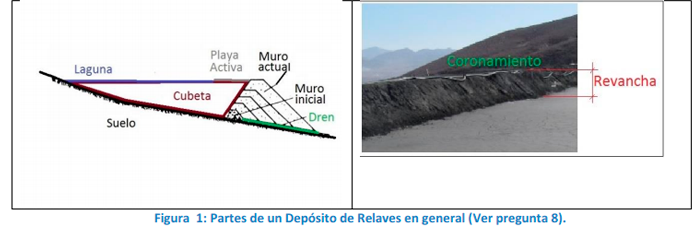

Además, dado que mayormente la actividad minera proviene de la minería del cobre u oro, solo se consideran aquellos depósitos de relaves cuyo Recurso sea: Cobre, Oro o Cobre-Oro.

In [48]:
# Filtro de solo muestras de cubeta
df_filtrado2 = df_geoquimica[df_geoquimica['Origen'] == 'CUBETA']

# Filtro de solo Recurso de ORO, COBRE o COBRE-ORO
Recursos = ['COBRE','ORO','COBRE-ORO',' COBRE', 'COBRE ']
df_filtrado = df_filtrado2[df_filtrado2['Recurso'].isin(Recursos)]

df_filtrado

,IDQ,Empresa o Dueno,Faena,Deposito,Recurso,masa (t),Estado,Origen,Region,Comuna,...,Tb(g/t),Dy(g/t),Ho(g/t),Er(g/t),Tm(g/t),Yb(g/t),Lu(g/t),Au(g/t),Hg(g/t),Unnamed: 69
2,3,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,LAS CENIZAS 4,COBRE,16500000,INACTIVO,CUBETA,VALPARAISO,CABILDO,...,0.46,3.12,0.58,1.61,0.25,1.46,0.23,"<0,02","<0,01",NaN
3,4,MINERA LAS CENIZAS S.A,LAS CENIZAS CABILDO,LAS CENIZAS 2,COBRE,858000,INACTIVO,CUBETA,VALPARAISO,CABILDO,...,0.41,2.35,0.49,1.55,0.19,1.2,0.13,"<0,02","<0,01",NaN
6,7,CODELCO,ANDINA,OVEJERIA,COBRE,1930000000,ACTIVO,CUBETA,METROPOLITANA,TIL TIL,...,0.17,0.99,0.18,0.53,0.04,0.44,0.04,"<0,02","<0,01",NaN
7,8,CODELCO,ANDINA,OVEJERIA,COBRE,1930000000,ACTIVO,CUBETA,METROPOLITANA,TIL TIL,...,0.19,0.89,0.15,0.53,0.05,0.37,0.06,"<0,02","<0,01",NaN
9,10,CIA. MINERA LA PATAGUA,LA PATAGUA,JAVITO,COBRE,2825285,ACTIVO,CUBETA,VALPARAISO,LA LIGUA,...,0.52,2.77,0.56,1.71,0.28,1.69,0.19,"<0,02","<0,01",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126,2195,DUEÑO DESCONOCIDO,PLANTA TORINO,TORINO 2,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.47,2.85,0.59,1.65,0.24,1.73,0.23,-,"<0,01",NaN
2127,2196,DUEÑO DESCONOCIDO,PLANTA CARMEN,TRANQUE DE RELAVES CARMEN,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.47,2.81,0.61,1.82,0.26,1.67,0.25,-,"<0,01",NaN
2128,2197,DUEÑO DESCONOCIDO,PLANTA CARMEN,TRANQUE DE RELAVES CARMEN,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.58,3.47,0.73,2.18,0.32,2,0.29,-,"<0,01",NaN
2129,2198,DUEÑO DESCONOCIDO,PLANTA CALLEJAS VALLENAR,TRANQUE DE RELAVES CALLEJAS VALLENAR,COBRE-ORO,S/I,ABANDONADO,CUBETA,ATACAMA,VALLENAR,...,0.2,1.15,0.23,0.68,0.1,0.58,0.09,-,"<0,01",NaN


### Limpieza por región

Para identificar en qué región se enfoca el estudio, se analizan todas las regiones que poseen depósitos de relaves. Además, dado que el objetivo es monitorear los depósitos, aquellos que carecen de monitoreo son los abandonados, por ende, aquellas regiones que posean mayor cantidad de depósitos en estado de abandonado serán priorizados. Cabe considerar que probablemente los depósitos tienen variaciones en sus características según la región, por lo que el monitoreo no sea extrpolable a todo el país.

In [71]:
frecuencia = df_catastro.groupby(['REGIÃ“N_IN', 'ESTADO_INS']).size().unstack(fill_value=0)
frecuencia['Total_Depositos'] = frecuencia.sum(axis=1)
frecuencia["Nombre"] = ["Tarapacá", "Antofagasta", "Atacama","Coquimbo", "RM", "Valparaíso","B.OHiggins", "Maule","Aysén"]
frecuencia

ESTADO_INS,ABANDONADO,ACTIVO,EN CONSTRUCCION,EN REVISION,INACTIVO,Total_Depositos,Nombre
REGIÃ“N_IN,,,,,,,
I,6,2,0,0,0,8,Tarapacá
II,16,12,0,0,24,52,Antofagasta
III,23,30,6,0,113,172,Atacama
IV,106,39,1,1,245,392,Coquimbo
RM,6,6,0,0,14,26,RM
V,11,14,0,0,55,80,Valparaíso
VI,1,3,0,0,15,19,B.OHiggins
VII,0,4,0,0,2,6,Maule
XI,4,0,0,0,5,9,Aysén


Se puede observar que la región de Coquimbo posee evidentemente la mayor cantidad de depósitos, con un total de 392 y con 106 abandonados

Por lo tanto, dado el catastro de Sernageomin, la región de Coquimbo es el candidato a ser el área de estudio, sin embargo, se debe verificar si en la base de datos de muestro se presenta un comportamiento similar.

In [76]:
frecuencia = df_filtrado.groupby(['Region', 'Estado']).size().unstack(fill_value=0)
frecuencia['Total_Depositos'] = frecuencia.sum(axis=1)
total_depositos = frecuencia['Total_Depositos'].sum()
frecuencia['Porcentaje_Depositos'] = (frecuencia['Total_Depositos'] / total_depositos) * 100
frecuencia

Estado,ABANDONADO,ACTIVO,INACTIVO,Total_Depositos,Porcentaje_Depositos
Region,,,,,
ANTOFAGASTA,15,10,49,74,7.922912
ATACAMA,24,33,143,200,21.413276
AYSEN,0,2,3,5,0.535332
COQUIMBO,17,38,452,507,54.282655
METROPOLITANA,8,7,18,33,3.533191
OHIGGINS,0,0,9,9,0.963597
TARAPACA,3,0,2,5,0.535332
VALPARAISO,5,11,85,101,10.813704


De esta manera, se rectifica que en la base de datos de muestreo, la región de Coquimbo posee la mayor cantidad de depósitos de relaves en Chile.

Luego, se procede a definir que el área de estudio es la región de Coquimbo

In [100]:
df_regiones = df_filtrado[df_filtrado['Region'] == 'COQUIMBO']
df_regiones

,IDQ,Empresa o Dueno,Faena,Deposito,Recurso,masa (t),Estado,Origen,Region,Comuna,...,Tb(g/t),Dy(g/t),Ho(g/t),Er(g/t),Tm(g/t),Yb(g/t),Lu(g/t),Au(g/t),Hg(g/t),Unnamed: 69
73,74,ALBERTO MAURICIO FUENTES RIVERA,LAXNAR,EMBALSE DE RELAVE,COBRE,S/I,INACTIVO,CUBETA,COQUIMBO,LA HIGUERA,...,0.45,2.35,0.47,1.36,0.19,1.21,0.17,0.05,0.57,NaN
75,76,COMITÉ DE PIRQUINEROS DE LOS MORROS (EX SILVIO...,LOS MORROS,LOS MORROS,ORO,S/I,ACTIVO,CUBETA,COQUIMBO,LA HIGUERA,...,0.3,1.62,0.34,1,0.14,0.97,0.14,0.27,5.14,NaN
77,78,CIA MINERA CLAUDIO ALBERTO ISA,ENRIQUETA,TRANQUE DE RELAVE,COBRE,4848,INACTIVO,CUBETA,COQUIMBO,LA HIGUERA,...,0.58,3.29,0.66,1.87,0.28,1.63,0.21,"<0,02",0.39,NaN
80,81,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),COBRE-ORO,38508,INACTIVO,CUBETA,COQUIMBO,LA HIGUERA,...,0.38,2.29,0.51,1.65,0.27,2.01,0.31,"<0,02",0.11,NaN
81,82,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),COBRE-ORO,38508,INACTIVO,CUBETA,COQUIMBO,LA HIGUERA,...,0.45,2.46,0.49,1.48,0.21,1.36,0.2,"<0,02",1.66,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1356,SCM TAMBILLOS,TAMBILLOS,AMPLIACION TRANQUE DE RELAVES 4,COBRE,376200,INACTIVO,CUBETA,COQUIMBO,COQUIMBO,...,0.42,2.38,0.47,1.44,0.23,1.55,0.21,"<0,02",1.64,NaN
1333,1357,DUEÑO DESCONOCIDO (OESTE ANDACOLLO),SIN NOMBRE,NN 25,COBRE-ORO,4785,ABANDONADO,CUBETA,COQUIMBO,ANDACOLLO,...,0.47,2.68,0.5,1.48,0.2,1.38,0.21,0.02,0.71,NaN
1335,1359,CIA. MINERA TAMAYA,PLANTA DELIRIO,DELIRIO 2,COBRE-ORO,111900,INACTIVO,CUBETA,COQUIMBO,PUNITAQUI,...,0.1,0.52,0.1,0.29,0.04,0.29,0.04,"<0,02",0.25,NaN
1336,1360,CIA. MINERA TAMAYA,PLANTA DELIRIO,DELIRIO 2,COBRE-ORO,111900,INACTIVO,CUBETA,COQUIMBO,PUNITAQUI,...,0.43,2.5,0.48,1.49,0.22,1.4,0.2,"<0,02",0.12,NaN


### Limpieza por Elementos químicos y variables de interés

Dado los motivos analizados en el informe, se proceden a filtrar los elementos químicos de interés

In [129]:
df_elementos_7 = df_regiones[['Empresa o Dueno', 'Faena','Deposito', "Estado", 'masa (t)', 'Coord. N', 'Coord. E','Cu(g/t)','Ni(g/t)','Zn(g/t)','Co(g/t)','As(g/t)']]
df_elementos_7

,Empresa o Dueno,Faena,Deposito,Estado,masa (t),Coord. N,Coord. E,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
73,ALBERTO MAURICIO FUENTES RIVERA,LAXNAR,EMBALSE DE RELAVE,INACTIVO,S/I,6742903.0,331564.0,2135,75,910,14,1956.08
75,COMITÉ DE PIRQUINEROS DE LOS MORROS (EX SILVIO...,LOS MORROS,LOS MORROS,ACTIVO,S/I,6748195.0,330373.0,4344,73,2499,24,17387.76
77,CIA MINERA CLAUDIO ALBERTO ISA,ENRIQUETA,TRANQUE DE RELAVE,INACTIVO,4848,6749709.0,294755.0,384,82,216,15,<20
80,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),INACTIVO,38508,6750489.0,293814.0,310,51,25,64,<20
81,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),INACTIVO,38508,6750499.0,293824.0,2161,73,82,22,<20
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,SCM TAMBILLOS,TAMBILLOS,AMPLIACION TRANQUE DE RELAVES 4,INACTIVO,376200,6656685.0,284124.0,1264,9,5354,<5,201.67
1333,DUEÑO DESCONOCIDO (OESTE ANDACOLLO),SIN NOMBRE,NN 25,ABANDONADO,4785,6653678.0,298421.0,1352,<5,10913,<5,<20
1335,CIA. MINERA TAMAYA,PLANTA DELIRIO,DELIRIO 2,INACTIVO,111900,6581661.0,285926.0,541,14,<5,220,242.26
1336,CIA. MINERA TAMAYA,PLANTA DELIRIO,DELIRIO 2,INACTIVO,111900,6581648.0,285929.0,384,16,<5,420,184.09


En las variables de los metales, existen datos nulos y valores con "<", que significa que el instrumento de medición no podía registrar muestras menores.

In [131]:
# Contar filas con todos los valores "<5" (estos estaban en Ni, Zn, Co) --> hay 552 filas (47%) que tienen esto, la valor real es menor que la capacidad de detección del instrumento, lo dejaré como 5
plomo = (df_elementos_7 == '<5').any(axis=1).sum()

# Contar filas con todos los valores "<20" (estos estaban en As) --> hay 703 filas (59,8%), lo dejaré como 20
arsenico = (df_elementos_7 == '<20').any(axis=1).sum()

# Contar filas con todos los valores "<10" (estos estaban en As) --> hay 10 filas (1%), las eliminaré
arsenico10 = (df_elementos_7 == '<10').any(axis=1).sum()

print(f"Filas de plomo, níquel o cobalto con los valores '<5': {plomo}")
print(f"Filas de arsénico con los valores '<20': {arsenico}")
print(f"Filas de arsénico con los valores '<10': {arsenico10}")

Filas de plomo, níquel o cobalto con los valores '<5': 189
Filas de arsénico con los valores '<20': 377
Filas de arsénico con los valores '<10': 10


Para tratar estos casos, se reemplazan los <[número] por [número]

In [133]:
# Reemplazar valores '<5' en la columna 'Ni(g/t)' por 5
df_elementos_7['Ni(g/t)'] = df_elementos_7['Ni(g/t)'].replace('<5', 5)

# Reemplazar valores '<5' en la columna 'Zn(g/t)' por 5
df_elementos_7['Zn(g/t)'] = df_elementos_7['Zn(g/t)'].replace('<5', 5)

# Reemplazar valores '<5' en la columna 'Co(g/t)' por 5
df_elementos_7['Co(g/t)'] = df_elementos_7['Co(g/t)'].replace('<5', 5)

# Reemplazar valores '<20' en la columna 'As(g/t)' por 20
df_elementos_7['As(g/t)'] = df_elementos_7['As(g/t)'].replace('<20', 20)

# Crear un boolean mask que identifica las filas con al menos un valor "<10"
mask = (df_elementos_7 == '<10').any(axis=1)

# Reemplazar valores '<10' en la columna 'As(g/t)' por 10
df_elementos_7['As(g/t)'] = df_elementos_7['As(g/t)'].replace('<10', 10)

In [135]:
# tranformo los valores de los elementos a float
df_elementos_7['Cu(g/t)'] = df_elementos_7['Cu(g/t)'].astype('float')
df_elementos_7['Ni(g/t)'] = df_elementos_7['Ni(g/t)'].astype('float')
df_elementos_7['As(g/t)'] = df_elementos_7['As(g/t)'].astype('float')
df_elementos_7['Co(g/t)'] = df_elementos_7['Co(g/t)'].astype('float')
df_elementos_7['Zn(g/t)'] = df_elementos_7['Zn(g/t)'].astype('float')

### Limpieza por masa de cada depósito de relave

Para obtener depósitos cuyo tamaño sea relativamente visible por las imágenes satelitales, se proceden a filtrar los depósitos cuyo tamaño estén en el primer cuartil

In [139]:
# Filtrar filas donde 'masa' no es igual a 'S/I'
df_filtrado3 = df_elementos_7.loc[df_elementos_7['masa (t)'] != 'S/I']
df_filtrado3['masa (t)'] = df_filtrado3['masa (t)'].astype('float')

In [141]:
# Identificaré los depósitos más pequeños, lo que pueden dificultar su detección

df_filtrado3[df_filtrado3['Estado'] == 'ABANDONADO'].describe()

,masa (t),Coord. N,Coord. E,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
count,17.000000,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,35648.941176,6.606352e+06,288932.352941,4022.764706,24.647059,965.941176,13.176471,74.232941
std,78824.214220,6.876349e+04,12212.010788,4350.031875,29.107433,2705.716459,8.487014,166.216804
min,900.000000,6.497674e+06,272649.000000,166.000000,5.000000,5.000000,5.000000,20.000000
25%,1500.000000,6.552671e+06,278803.000000,1209.000000,5.000000,5.000000,5.000000,20.000000
50%,20250.000000,6.617333e+06,294366.000000,1803.000000,5.000000,53.000000,10.000000,20.000000
75%,42774.000000,6.652224e+06,299302.000000,6452.000000,21.000000,263.000000,21.000000,20.000000
max,334525.000000,6.736948e+06,305845.000000,13479.000000,79.000000,10913.000000,26.000000,664.070000


In [152]:
# eliminaré 29 filas (20 depósitos) por ser parte del 25% más chico de los abandonados

df_relaves = df_filtrado3.loc[df_filtrado3['masa (t)'] > 1500]

Luego, dado todos los filtros aplicados, se eliminan los depósitos que tengan más de un muestreo, esto dado a que son minoría y para estandarizar las condiciones de cada depósito de relave

In [154]:
df_relaves = df_relaves.drop_duplicates(subset=['Empresa o Dueno','Faena','Deposito','Estado']).reset_index(drop = True)
df_relaves

,Empresa o Dueno,Faena,Deposito,Estado,masa (t),Coord. N,Coord. E,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
0,CIA MINERA CLAUDIO ALBERTO ISA,ENRIQUETA,TRANQUE DE RELAVE,INACTIVO,4848.0,6749709.0,294755.0,384.0,82.0,216.0,15.0,20.00
1,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),INACTIVO,38508.0,6750489.0,293814.0,310.0,51.0,25.0,64.0,20.00
2,SOC. EXPLOTADORA MINERA RA LTDA.,RA,EMBALSE DE RELAVE RA,ACTIVO,552148.0,6753245.0,291797.0,143.0,72.0,170.0,15.0,20.00
3,SLM TESORO,TESORO,TESORO 4,ACTIVO,235188.0,6750114.0,299527.0,1630.0,89.0,525.0,16.0,20.00
4,SLM TESORO,TESORO,TESORO 1-2-3,INACTIVO,76809.0,6750165.0,299481.0,375.0,73.0,34.0,39.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...
253,SCM TAMBILLOS,TAMBILLOS,TRANQUE DE RELAVE 3,INACTIVO,256671.0,6656790.0,283955.0,250.0,5.0,982.0,5.0,20.00
254,SCM TAMBILLOS,TAMBILLOS,TRAMQUE DE RELAVE 4,INACTIVO,9336498.0,6656798.0,284217.0,773.0,9.0,2869.0,5.0,20.00
255,SCM TAMBILLOS,TAMBILLOS,AMPLIACION TRANQUE DE RELAVES 4,INACTIVO,376200.0,6656802.0,284084.0,741.0,11.0,5707.0,5.0,277.26
256,DUEÑO DESCONOCIDO (OESTE ANDACOLLO),SIN NOMBRE,NN 25,ABANDONADO,4785.0,6653678.0,298421.0,1352.0,5.0,10913.0,5.0,20.00


### Limpieza de coordenadas

Para poder localizar las imágenes satelitales en la plataforma Data Cube y para poder crear los polígnos en Google Earth Pro, se proceden a transformar las coordenadas de cada depóstio de UTM a Latitud y Longitud.

In [158]:
!pip install pyproj pandas

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------- ------------- 4.2/6.3 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 21.4 MB/s eta 0:00:00


In [162]:
from pyproj import Proj, transform

from pyproj import Proj, transform

# Se definen las columnas que contienen las coordenadas UTM
coord_n_col = 'Coord. N'
coord_e_col = 'Coord. E'
zona_utm = 19  # Zona UTM 19S para todos los depósitos

# Función para convertir UTM a Latitud y Longitud
def utm_to_latlon(easting, northing, zone, hemisphere='south'):
    # Se define el proyector UTM y WGS84
    if hemisphere == 'south':
        utm_proj = Proj(proj='utm', zone=zone, ellps='WGS84', south=True)
    else:
        utm_proj = Proj(proj='utm', zone=zone, ellps='WGS84')
    wgs84_proj = Proj(proj='latlong', datum='WGS84')

    # Se convierten las coordenadas
    lon, lat = transform(utm_proj, wgs84_proj, easting, northing)
    return lat, lon

# Se aplica la conversión a cada fila en el DataFrame
df_relaves[['Latitud', 'Longitud']] = df_relaves.apply(
    lambda row: utm_to_latlon(row[coord_e_col], row[coord_n_col], zona_utm), axis=1, result_type='expand'
)

In [164]:
# Se eliminan las columnas UTM

df = df_relaves.drop(['Coord. N', 'Coord. E'], axis=1)
df = df[['Empresa o Dueno','Faena',"Deposito","Estado", "Latitud", "Longitud", 'Cu(g/t)','Ni(g/t)','Zn(g/t)','Co(g/t)','As(g/t)']]
df.head()

,Empresa o Dueno,Faena,Deposito,Estado,Latitud,Longitud,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
0,CIA MINERA CLAUDIO ALBERTO ISA,ENRIQUETA,TRANQUE DE RELAVE,INACTIVO,-29.365070,-71.114462,384.0,82.0,216.0,15.0,20.0
1,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),INACTIVO,-29.357881,-71.124005,310.0,51.0,25.0,64.0,20.0
2,SOC. EXPLOTADORA MINERA RA LTDA.,RA,EMBALSE DE RELAVE RA,ACTIVO,-29.332692,-71.144250,143.0,72.0,170.0,15.0,20.0
3,SLM TESORO,TESORO,TESORO 4,ACTIVO,-29.362187,-71.065253,1630.0,89.0,525.0,16.0,20.0
4,SLM TESORO,TESORO,TESORO 1-2-3,INACTIVO,-29.361720,-71.065718,375.0,73.0,34.0,39.0,20.0


In [169]:
# guardar el dataframe como.csv

df.to_csv('depositos_relaves_AOI_Coquimbo_final.csv', index=False)

# 3) Create KMZ Files

In [167]:
pip install simplekml

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65874 sha256=b3faacb0546719efef74664871655bc1337db2b06ad3fb64e2ddd9597a7ea704
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\83\ee\f2\65cecfd948f1429ead035fd6d56bc6bd6574a636ddc4d65cbd
Successfully built simplekml
Note: you may need to restart the kernel to use updated packages.


In [171]:
import simplekml

# Cargar el dataframe con los datos de los depósitos
df = pd.read_csv("depositos_relaves_AOI_Coquimbo_final.csv")
df.head()

,Empresa o Dueno,Faena,Deposito,Estado,Latitud,Longitud,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
0,CIA MINERA CLAUDIO ALBERTO ISA,ENRIQUETA,TRANQUE DE RELAVE,INACTIVO,-29.365070,-71.114462,384.0,82.0,216.0,15.0,20.0
1,COMPAÑÍA MINERA QUEBRADA HONDA (EX SOC. MINE...,PLANTA SAN ALEJANDRO (EX TRAPICHE),SAN ALEJANDRO (EX TRAPICHE 1-2),INACTIVO,-29.357881,-71.124005,310.0,51.0,25.0,64.0,20.0
2,SOC. EXPLOTADORA MINERA RA LTDA.,RA,EMBALSE DE RELAVE RA,ACTIVO,-29.332692,-71.144250,143.0,72.0,170.0,15.0,20.0
3,SLM TESORO,TESORO,TESORO 4,ACTIVO,-29.362187,-71.065253,1630.0,89.0,525.0,16.0,20.0
4,SLM TESORO,TESORO,TESORO 1-2-3,INACTIVO,-29.361720,-71.065718,375.0,73.0,34.0,39.0,20.0


In [175]:
# Crear un nuevo archivo KML con información extra
kml = simplekml.Kml()

# Añadir puntos para cada depósito de relaves
for index, row in df.iterrows():
    pnt = kml.newpoint(name=row['Deposito'], coords=[(row['Longitud'], row['Latitud'])])
    pnt.style.iconstyle.icon.href = 'http://maps.google.com/mapfiles/kml/shapes/placemark_circle.png'

# Guardar el archivo KML
kml.save("depositos_AOI_4.kml")

# Convertir el archivo KML a KMZ
import zipfile
with zipfile.ZipFile("depositos_AOI_4.kmz", 'w', zipfile.ZIP_DEFLATED) as kmz:
    kmz.write("depositos_AOI_4.kml")

print("Archivo KMZ creado exitosamente.")

Archivo KMZ creado exitosamente.


In [177]:
# Crear un nuevo archivo KML
kml = simplekml.Kml()

# Añadir puntos para cada depósito de relaves
for index, row in df.iterrows():
    pnt = kml.newpoint(name=row['Deposito'], coords=[(row['Longitud'], row['Latitud'])])
    pnt.description = (
        f"Empresa o Dueño: {row['Empresa o Dueno']}\n"
        f"Faena: {row['Faena']}\n"
        f"Estado: {row['Estado']}\n"
        f"Cu(g/t): {row['Cu(g/t)']}\n"
        f"Ni(g/t): {row['Ni(g/t)']}\n"
        f"Zn(g/t): {row['Zn(g/t)']}\n"
        f"Co(g/t): {row['Co(g/t)']}\n"
        f"As(g/t): {row['As(g/t)']}"
    )

# Guardar el archivo KML
kml.save("depositos_coquimbo_final.kml")

# Convertir el archivo KML a KMZ
import zipfile
with zipfile.ZipFile("depositos_coquimbo_final.kmz", 'w', zipfile.ZIP_DEFLATED) as kmz:
    kmz.write("depositos_coquimbo_final.kml")

# 4) Gathering Satellite images

La siguiente sección se realiza en la plataforma Open Data Cube que contienen los registros e imagénes del satélite Landsat 8 utilizadas.

Para más información consultar en: https://github.com/Data-Observatory/DataCubeTraining/blob/main/samsara/00_SAMSARA_intro.ipynb 

In [ ]:
import datacube
from odc.ui import DcViewer
from odc.ui import with_ui_cbk
# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)
import sys
import xarray as xr
%matplotlib inline
sys.path.append("../Scripts")
from deafrica_plotting import display_map
from deafrica_plotting import rgb

from datacube.utils import geometry, masking
import geopandas as gpd

import rasterio as rio
import rioxarray
import rasterstats as rstats
from rasterstats import zonal_stats

from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)

from datacube.utils import masking
from datacube.utils.rio import configure_s3_access

configure_s3_access(aws_unsigned=False, requester_pays=True, client=client)

client

In [ ]:
dc = datacube.Datacube(app="relaves")

A continuación, se cargan los polígonos creados en Google Earth Pro con los archivos KMZ creados en la sección 3. En el informe se detalla el uso de los polígonos. Pero, a groso modo es para obtener la reflectancia exclusivamente del interior de cada depósito y no de la imagen completa.

In [ ]:
# Cargar archivos GeoJSON
poly_2015_1 = gpd.read_file('2015_1.geojson')
poly_2015_2 = gpd.read_file('2015_2.geojson')
poly_2015_3 = gpd.read_file('2015_3.geojson')
poly_2015_4 = gpd.read_file('2015_4.geojson')
poly_2016_1 = gpd.read_file('2016_1.geojson')
poly_2016_2 = gpd.read_file('2016_2.geojson')
poly_2016_3 = gpd.read_file('2016_3.geojson')
poly_2017d = gpd.read_file('2017d.geojson')


# Cargar archivos GeoJSON y asegurarse de que todos los polígonos estén en el mismo CRS
def asegurar_mismo_crs(poly, crs="EPSG:4326"):
    if poly.crs != crs:
        poly = poly.to_crs(crs)
    print("CRS del polígono:", poly.crs)
    return poly

# Diccionario de fechas para cada grupo de polígonos, puse las fechas (con datos) más cercanas a cada muestreo in situ de cada polígono (hay otras fechas de landsat 8 más cercanas al muestreo en 
# terreno, pero no tenían datos
fechas_grupos = {
    'poly_2015_1': "2015-10-02", # Fecha muestreo in situ de estos polígonos: 2015-09-03 
    'poly_2015_2': "2015-10-02",# Fecha muestreo in situ de estos polígonos: 2015-10-16
    'poly_2015_3': "2015-11-19",# Fecha muestreo in situ de estos polígonos: 2015-11-06
    'poly_2015_4': "2015-12-05", # Fecha muestreo in situ de estos polígonos: 2015-12-09
    'poly_2016_1': "2016-01-22",# Fecha muestreo in situ de estos polígonos: 2016-02-01
    'poly_2016_2': "2016-02-23",# Fecha muestreo in situ de estos polígonos: 2016-03-01
    'poly_2016_3': "2016-06-14",# Fecha muestreo in situ de estos polígonos: 2016-05-09
    'poly_2017d': "2017-12-10" # Fecha muestreo in situ de estos polígonos: 2017-12-11
}

# Cargar todos los polígonos y asegurar el mismo CRS
poligonos_grupos = {
    'poly_2015_1': asegurar_mismo_crs(poly_2015_1),
    'poly_2015_2': asegurar_mismo_crs(poly_2015_2),
    'poly_2015_3': asegurar_mismo_crs(poly_2015_3),
    'poly_2015_4': asegurar_mismo_crs(poly_2015_4),
    'poly_2016_1': asegurar_mismo_crs(poly_2016_1),
    'poly_2016_2': asegurar_mismo_crs(poly_2016_2),
    'poly_2016_3': asegurar_mismo_crs(poly_2016_3),
    'poly_2017d': asegurar_mismo_crs(poly_2017d)
}

# Función para asegurar el CRS y transformar solo para el cálculo de área
def transformar_a_utm_para_area(poly, utm_crs="EPSG:32719"):
    return poly.to_crs(utm_crs)

Luego, se preparan las funciones para obtener la reflectancia y área de cada depósito.

In [ ]:
def cargar_reflectancia_landsat(product, x_range, y_range, time):
    ds = dc.load(
        product=product,
        measurements=["coastal", "blue", "green", "red", "nir08", "swir16", "swir22", "qa_pixel"],
        x=x_range,
        y=y_range,
        time=time,
        output_crs="EPSG:4326",
        resolution=(-0.0002695, 0.0002695),
        dask_chunks={"time": 1}
    )
    
    # Definir los valores de máscara para nubes, nieve, etc.
    good_pixel_flags = {
        "snow": "not_high_confidence",
        "cloud": "not_high_confidence",
        "cirrus": "not_high_confidence",
        "cloud_shadow": "not_high_confidence",
        "nodata": False
    }

    # Crear y aplicar la máscara de nubes
    cloud_free_mask = masking.make_mask(ds['qa_pixel'], **good_pixel_flags)       
    reflectance_bands = ["coastal", "blue", "green", "red", "nir08", "swir16", "swir22"]
    masked = ds[reflectance_bands].where(cloud_free_mask)

    # Escalar los valores de reflectancia para Landsat 8
    masked = masked * 0.0000275 + -0.2
    
    return masked

In [ ]:
# Calcular reflectancia promedio y área en m² del polígono
def calcular_reflectancia_y_area(ds, poligono_gdf, poligono_idx=0):
    poligono = poligono_gdf.iloc[poligono_idx]
    geometry = [poligono.geometry]

    # Calcular área en m² usando UTM
    poligono_utm = transformar_a_utm_para_area(poligono_gdf)
    area_m2 = poligono_utm.iloc[poligono_idx].geometry.area
    
    # Recortar el dataset usando la geometría del polígono en EPSG:4326
    clipped_ds = ds.rio.clip(geometry, all_touched=True, drop=True)

    mean_reflectance = {
        band: clipped_ds[band].mean().compute().item() for band in clipped_ds.data_vars if not clipped_ds[band].isnull().all()
    }
    
    resultado = {
        'Name': poligono.get('name', ''),
        'Description': poligono.get('description', ''),
        'Area_m2': area_m2,
        **mean_reflectance
    }
    return resultado

In [ ]:
# Esta función es para separar los campos de los polígonos, y colocarlos como columnas en el CSV
def preparar_datos_para_csv(result):
    descripcion = result.get('Description', '')
    campos = {
        'Empresa o Dueño': '',
        'Faena': '',
        'Estado': '',
        'Cu(g/t)': '',
        'Ni(g/t)': '',
        'Zn(g/t)': '',
        'Co(g/t)': '',
        'As(g/t)': '',
        'Fecha': ''
    }
    
    for linea in descripcion.split('\n'):
        if ':' in linea:
            clave, valor = linea.split(':', 1)
            if clave.strip() in campos:
                campos[clave.strip()] = valor.strip()
    
    result.update(campos)
    result.pop('Description', None)

    bandas = ['coastal', 'blue', 'green', 'red', 'nir08', 'swir16', 'swir22']
    for banda in bandas:
        if isinstance(result.get(banda), xr.DataArray):
            result[banda] = float(result[banda].values)
        elif result.get(banda) is None:
            result[banda] = None
    
    return result

A continuación, se obtiene la reflectancia promedio por banda para cada depósito de relave

In [ ]:
# Almacenar resultados para CSV
resultados_finales = []
for nombre_grupo, poligonos in poligonos_grupos.items():
    fecha = fechas_grupos[nombre_grupo]
    
    for idx, poligono in poligonos.iterrows():
        try:
            bounds = poligono.geometry.bounds
            x_range = (bounds[0], bounds[2])
            y_range = (bounds[1], bounds[3])
            
            reflectancia = cargar_reflectancia_landsat(
                product="landsat8_c2l2_sr",
                x_range=x_range,
                y_range=y_range,
                time=fecha
            )
            
            resultado_poligono = calcular_reflectancia_y_area(reflectancia, poligonos, poligono_idx=idx)
            
            if resultado_poligono:
                resultado_preparado = preparar_datos_para_csv(resultado_poligono)
                resultados_finales.append(resultado_preparado)
                print(f"Polígono {idx+1} en {nombre_grupo} calculado con éxito.")
        
        except Exception as e:
            print(f"El polígono {idx+1} en {nombre_grupo} no se pudo procesar: {e}")
            continue

Luego, se gusrdan y exportan los resultados

In [ ]:
df_final = pd.DataFrame(resultados_finales)
# Guardar todos los resultados en un archivo CSV
df_final['Area_m2'] = df_final['Area_m2'].apply(lambda x: f"{x:.2f}")

# Guardar el DataFrame como CSV
df_final.to_csv("reflectancia_todos_poligonos.csv", index=False)

# 5) EDA

In [197]:
df = pd.read_excel(r"..\Data\final\reflectancia_todos_poligonos.xlsx")
df.head()

,Name,Area_m2,coastal,blue,green,red,nir08,swir16,swir22,Empresa o DueÃ±o,Faena,Estado,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t),Fecha
0,Arenas 1,345.16,0.012768,0.025053,0.048469,0.055709,0.177073,0.126617,0.086626,"JOSE ALVAREZ A., EXPLOR. Y EXPLOT. MINERA EIRL",LAS ROJAS,INACTIVO,4456.0,119.0,1411.0,14.0,281.19,2023-06-09 00:00:00
1,Arenas 2,9560.90,0.037124,0.052308,0.081535,0.101893,0.164260,0.133963,0.112785,"JOSE ALVAREZ A., EXPLOR. Y EXPLOT. MINERA EIRL",LAS ROJAS,INACTIVO,1129.0,137.0,377.0,17.0,20.00,2023-06-09 00:00:00
2,Arenillas 4,914.66,0.047356,0.062082,0.101806,0.122637,0.198736,0.218990,0.183151,CIA. MINERA ARENILLAS,MINERA ARENILLAS,ACTIVO,114.0,67.0,39.0,13.0,20.00,9/21/2023
3,Delta,985705.36,0.037434,0.057119,0.089854,0.103132,0.137170,0.143630,0.128079,ENAMI,DELTA,ACTIVO,1176.0,68.0,184.0,19.0,20.00,8/15/2023
4,Embalse de Relave RA,29045.17,0.096139,0.124600,0.179886,0.209223,0.242400,0.273425,0.223998,SOC. EXPLOTADORA MINERA RA LTDA.,RA,ACTIVO,143.0,72.0,170.0,15.0,20.00,2023-11-08 00:00:00


Las bandas espectrales parecen estar bien en los órdenes de magnitud, sin embargo, las variables de respuesta poseen valores máximos en escalas superiores al resto de datos, respectivamente.

In [199]:
df.describe()

,Area_m2,coastal,blue,green,red,nir08,swir16,swir22,Cu(g/t),Ni(g/t),Zn(g/t),Co(g/t),As(g/t)
count,2.280000e+02,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,2.723607e+04,0.061378,0.082679,0.126123,0.150515,0.199557,0.225038,0.194004,2446.285088,50.171053,684.868421,18.491228,150.381140
std,1.975849e+05,0.024437,0.029230,0.040021,0.047786,0.054895,0.073201,0.066846,2710.126112,33.194151,2737.379206,18.541890,408.915584
min,2.813800e+02,0.008365,0.023547,0.038604,0.044562,0.064504,0.067919,0.056538,33.000000,5.000000,5.000000,5.000000,10.000000
25%,1.960410e+03,0.044076,0.061882,0.098122,0.116211,0.159095,0.171721,0.149508,735.500000,11.000000,54.750000,5.000000,20.000000
50%,4.702125e+03,0.059666,0.078243,0.121692,0.141994,0.202441,0.223717,0.189595,1563.000000,65.000000,120.500000,15.000000,20.000000
75%,1.314900e+04,0.076980,0.101763,0.154361,0.181322,0.239978,0.279574,0.240252,3200.750000,72.000000,291.250000,23.000000,84.957500
max,2.821566e+06,0.141071,0.190398,0.275846,0.327923,0.354021,0.433829,0.416420,15039.000000,158.000000,32834.000000,190.000000,3519.160000


Los detalles del análisis de cada histograma están presentes en el informe. 

Al visualizar la distribución de los metales se observa una clara asimetría a la derecha, y para el caso del níquel una bimodalidad

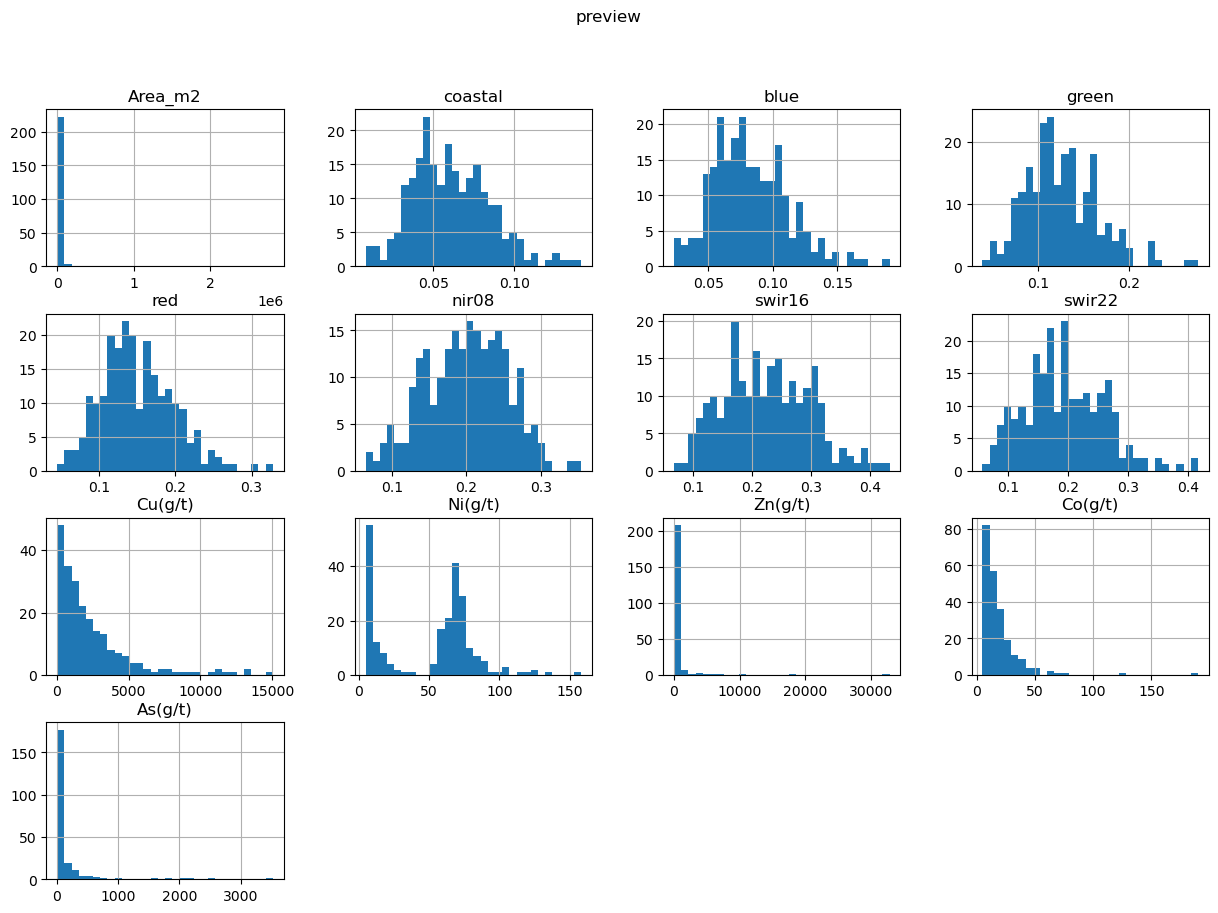

In [208]:
import matplotlib.pyplot as plt

df2 = df.drop(columns=['Name', 'Empresa o DueÃ±o', 'Faena', 'Estado', 'Fecha'])

df2.hist(bins = 30, figsize=(15,10))
plt.suptitle("preview")
plt.show()

Se analiza visualmente la presencia de outliers en las variables de respuesta por medio de boxplots

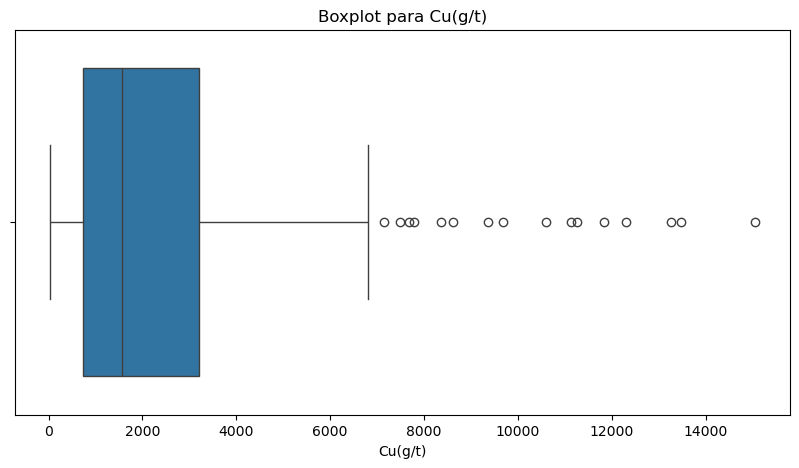

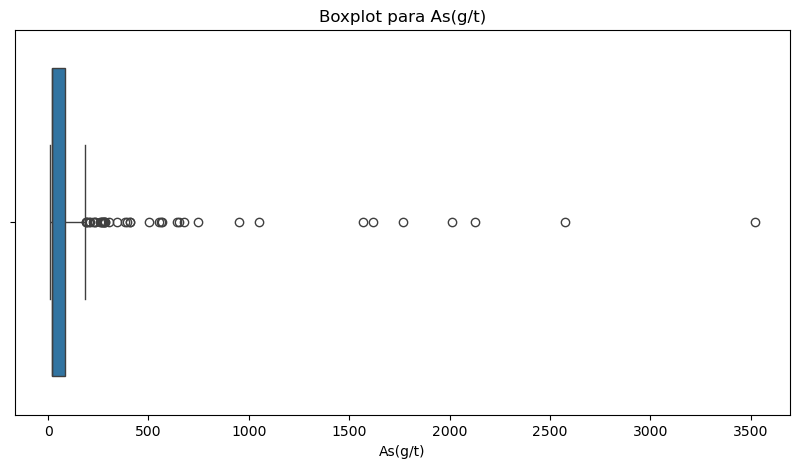

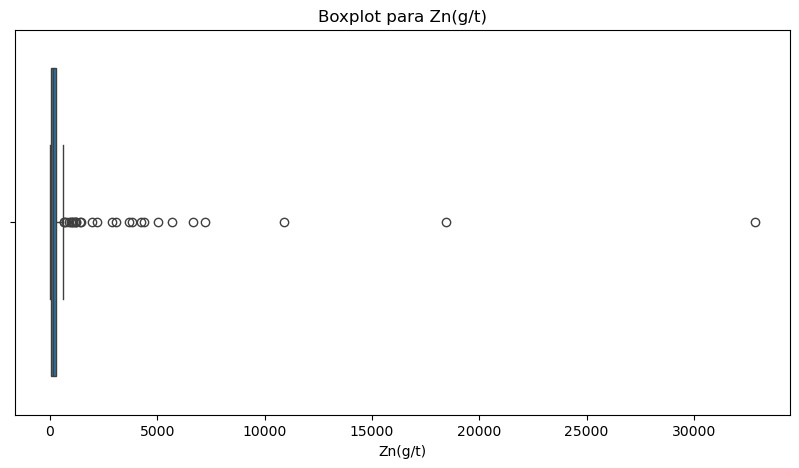

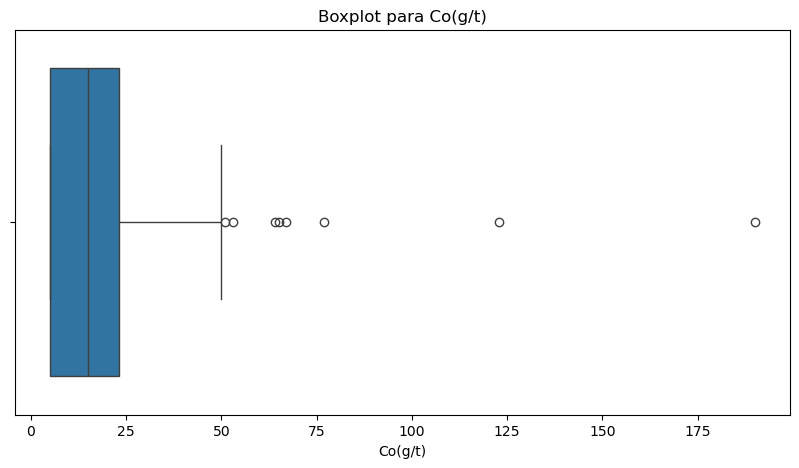

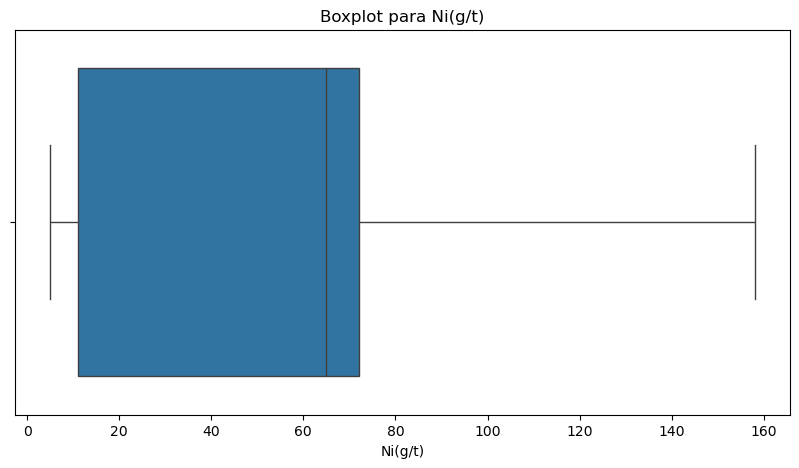

In [225]:
import seaborn as sns

metales = df2[['Cu(g/t)', 'As(g/t)', 'Zn(g/t)', 'Co(g/t)', 'Ni(g/t)']]

for columna in metales.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=metales, x=columna)
    plt.title(f'Boxplot para {columna}')
    plt.show()

En los scatterplot se observa que los metales no poseen una relación fuerte con las bandas espectrales

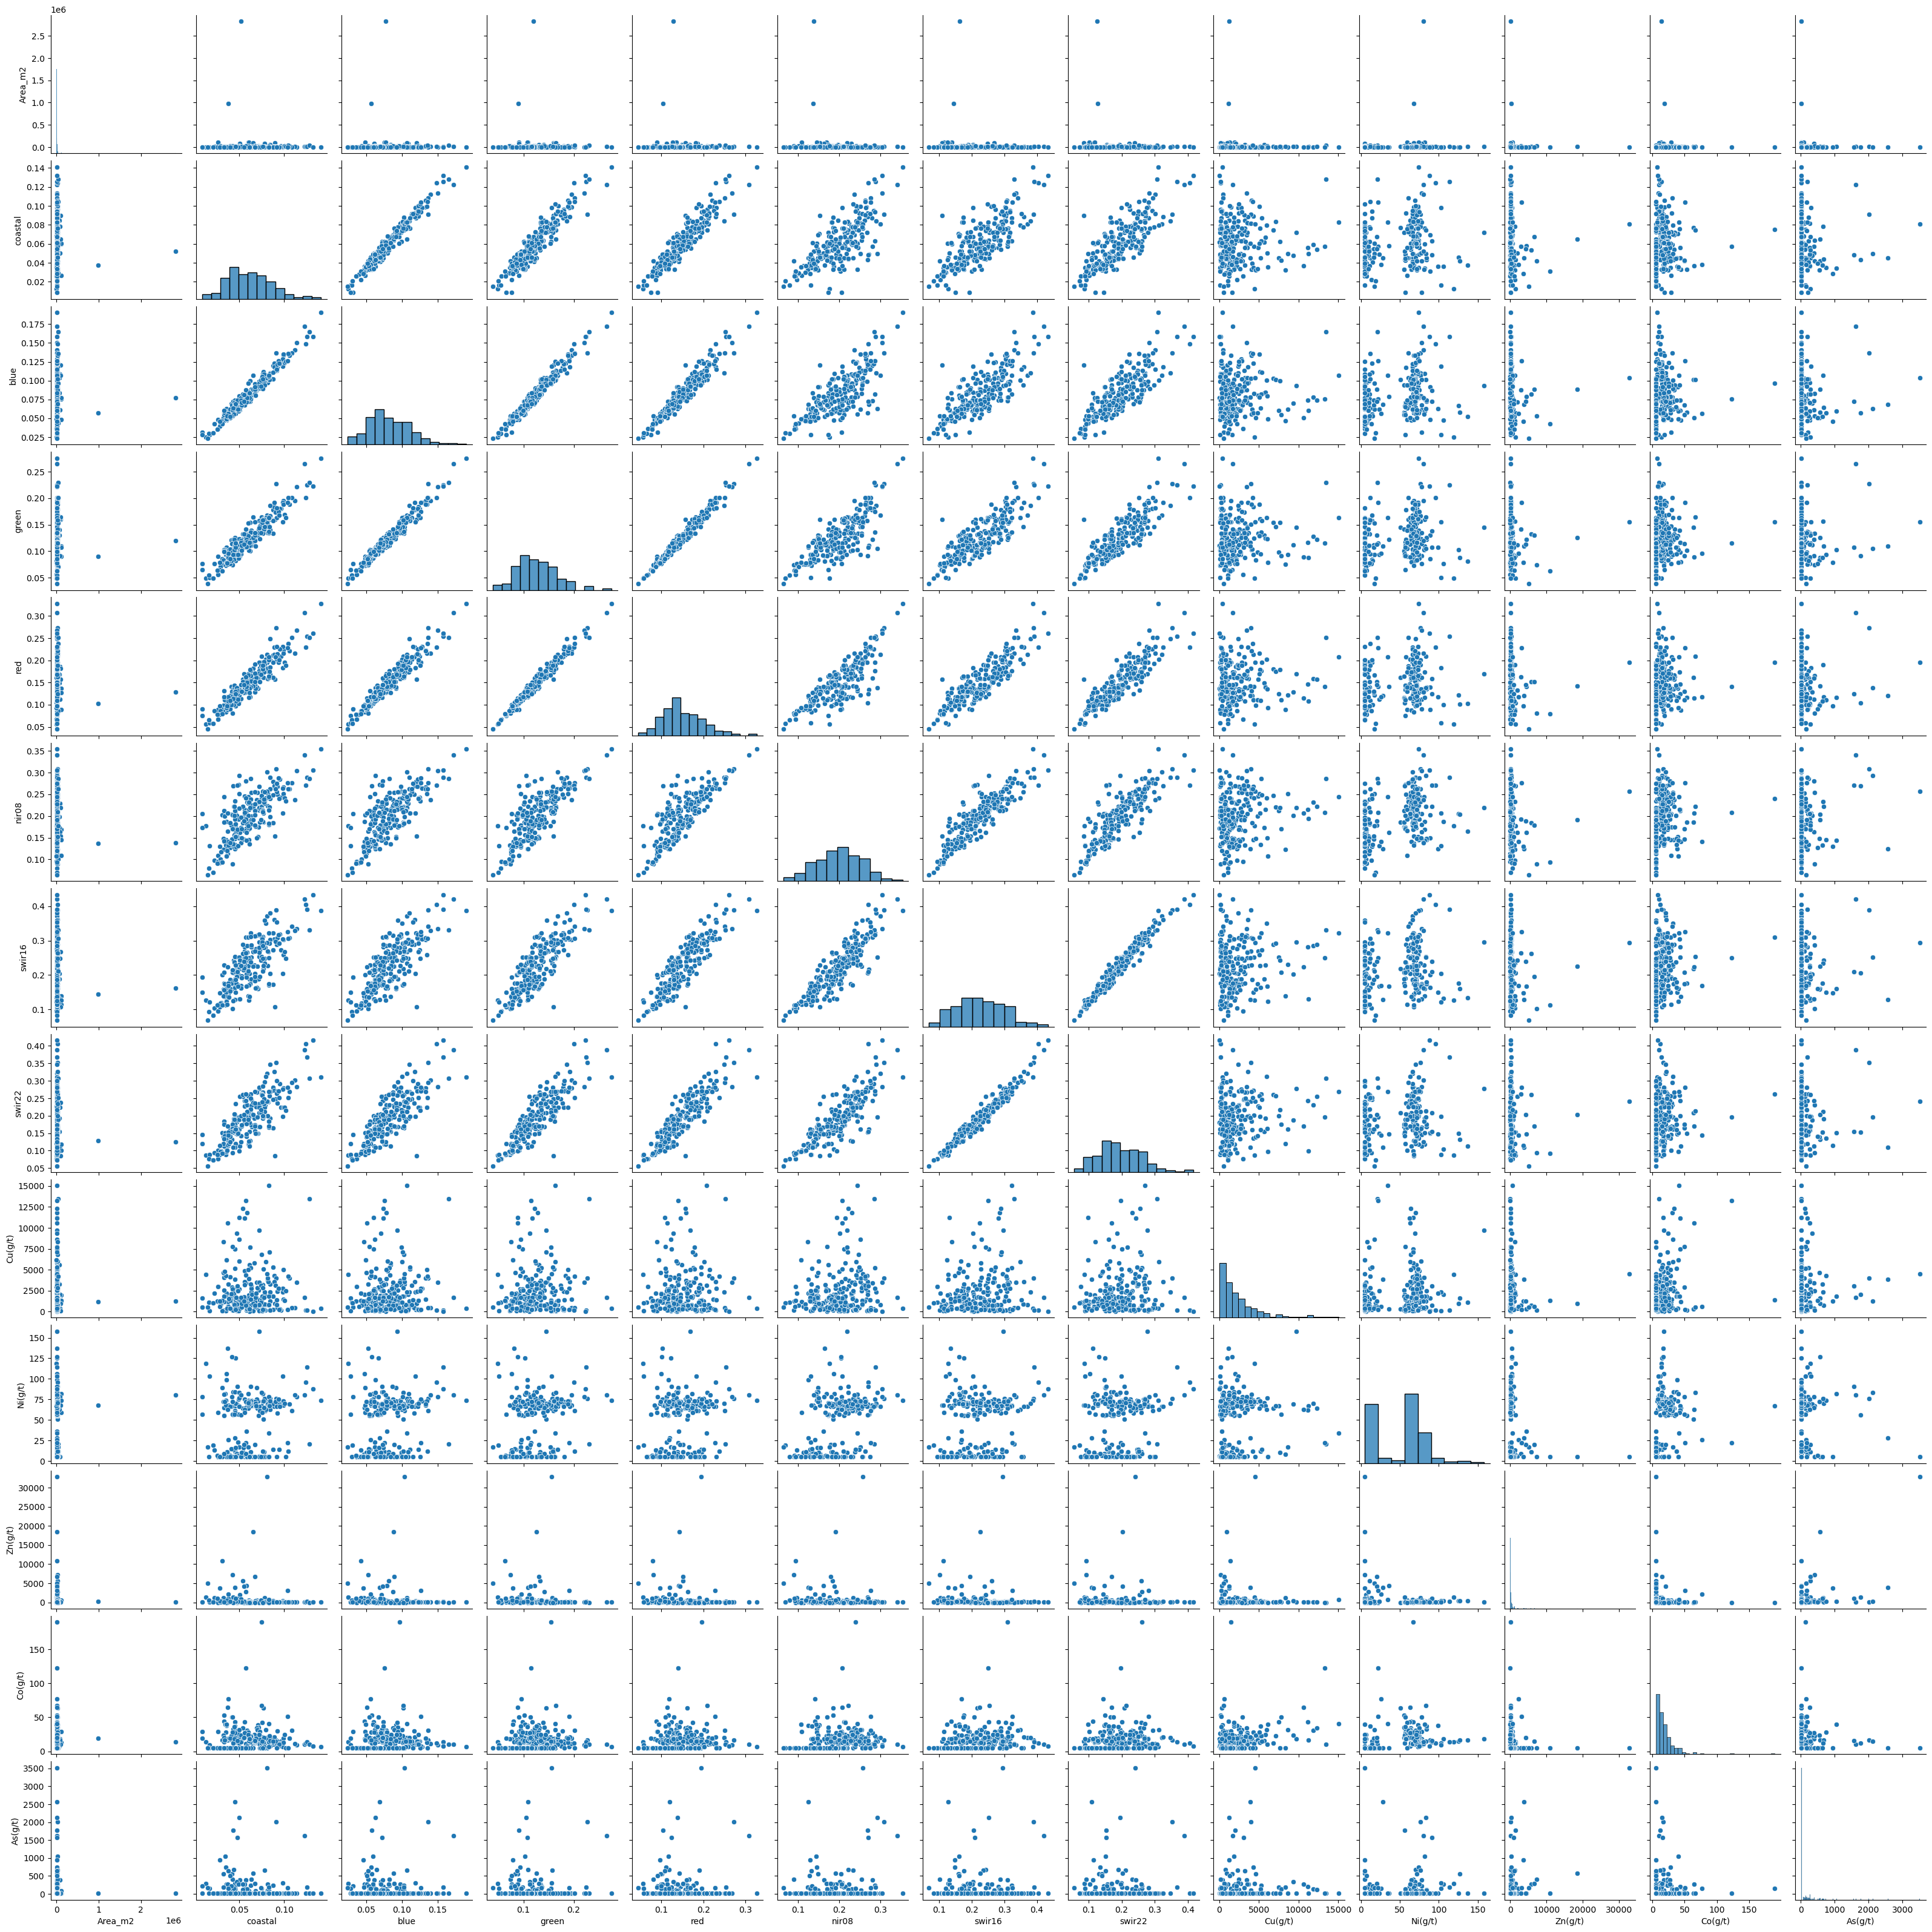

In [227]:
sns.pairplot(df2)

# 6) El pre-Modeling, Modeling and Results están en el archivo de R